In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

In [28]:
def get_mean_angle_train_data(filename):
    train_data = pd.read_csv(filename, header=None)
    mean_angle = train_data[0]
    return mean_angle

In [29]:
# get data
train_data_files = glob.glob(os.path.join("../data/train_thetas/", "*.csv"))
train_data_files.sort(key=lambda f: int(re.sub('\D', '', f)))
train_data = [get_mean_angle_train_data(f) for f in train_data_files]# shape 15000 * (1600)

target_train_files = glob.glob(os.path.join("../data/training_ground_truth_files", "*_ground"))
target_train_files.sort(key=lambda f: int(re.sub('\D', '', f)))
target_train = [pd.read_csv(f, header=None, sep=' ', dtype="int8").to_numpy().flatten() for f in target_train_files] # shape 15000 * (40, 40)


In [30]:
first_file = pd.read_csv(train_data_files[0], header=None)
first_file.head()

,0,1
0,0.052572,0.003979
1,0.030853,0.000646
2,0.044606,0.000700
3,0.037843,0.000504
4,0.036762,0.000308


0       0.052572
1       0.030853
2       0.044606
3       0.037843
4       0.036762
          ...   
1595    0.037288
1596    0.038946
1597    0.037255
1598    0.042186
1599    0.035046
Name: 0, Length: 1600, dtype: float64


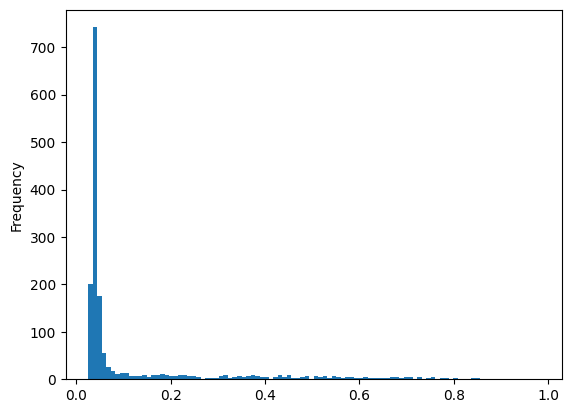

In [31]:
# plot first column histogram
first_column = first_file[0]
print(first_column)

first_column.plot.hist(bins=100)
plt.show()

In [32]:
# add a column to first_file named 'mean_angle' equal to sum of all but first columns divided by first column

first_file['mean_angle'] = first_file.iloc[:, 1:].sum(axis=1) / first_file[0]

mean_angle = first_file['mean_angle']

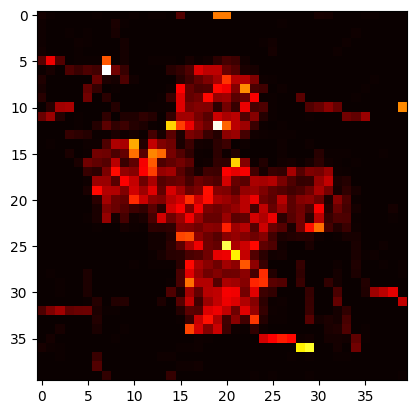

In [33]:
# reshape mean_angle to 40x40
mean_angle = mean_angle.values.reshape(40, 40)

# plot mean_angle as a heatmap
plt.imshow(mean_angle, cmap='hot', interpolation='nearest')
plt.show()

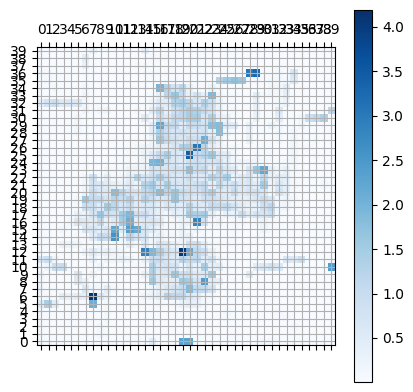

In [34]:
plt.matshow(mean_angle, cmap=plt.cm.Blues, origin='lower')
plt.colorbar()

ax = plt.gca();
ax.set_xticks(np.arange(0, 40, 1));
ax.set_yticks(np.arange(0, 40, 1));

plt.grid()
plt.show()

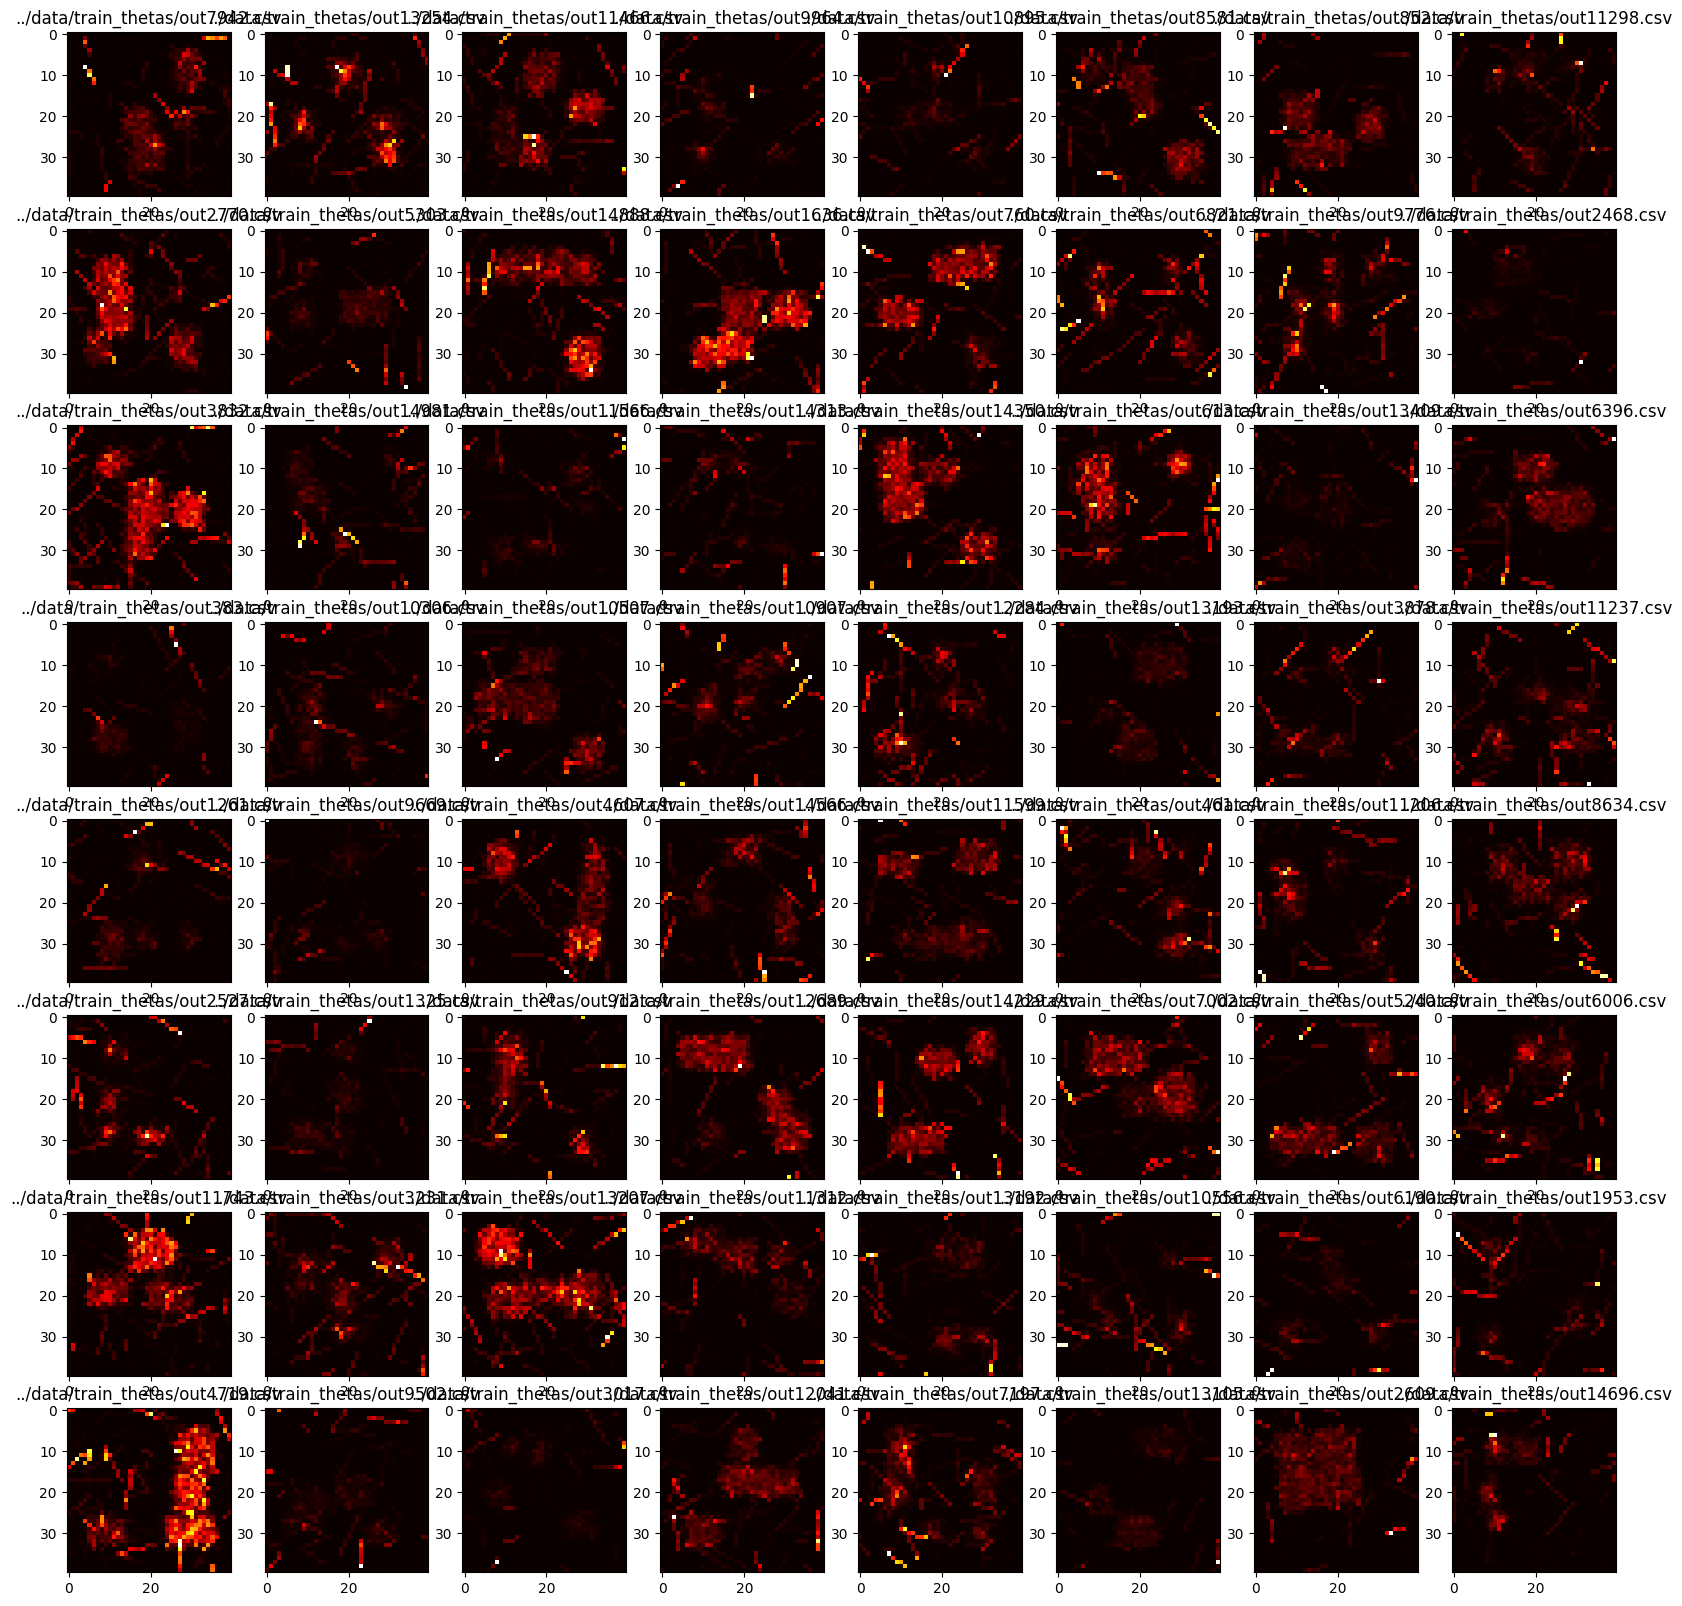

In [35]:
# visualise heatmaps of mean_angle from 64 random files in a grid

# create a list of 64 random files
random_files = np.random.choice(train_data_files, 64)

# create a list of 64 mean_angles
conf_div_angles = []

for file in random_files:
    df = pd.read_csv(file, header=None)
    df['conf_div_angle'] = df[1] / df[0]
    conf_div_angle = df['conf_div_angle']
    conf_div_angle = conf_div_angle.values.reshape(40, 40)
    conf_div_angles.append(conf_div_angle)

# plot mean_angles as a grid of heatmaps
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(conf_div_angles[i], cmap='hot', interpolation='nearest')
    ax.set_title(random_files[i])
    
plt.show()



In [36]:
# plot average angle of each class as a bar chart

classes = {}

for file_idx in range(len(train_data)):
    train_grid = train_data[file_idx]
    target_grid = target_train[file_idx]

    for grid_idx in range(len(train_grid)):
        angle = train_grid[grid_idx]
        target = target_grid[grid_idx]
        
        if np.isnan(angle):
            continue

        if target not in classes:
            classes[target] = [angle]
        else:
            classes[target].append(angle)

for key in classes:
    classes[key] = np.mean(classes[key])

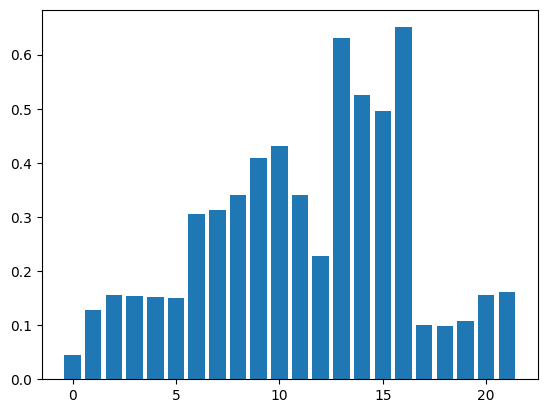

In [37]:
plt.bar(classes.keys(), classes.values())
plt.show()

In [38]:
# map target_train using classes dictionary
means_target_train = np.zeros((len(target_train), len(target_train[0])))

for file_idx in range(len(target_train)):
    target_grid = target_train[file_idx]

    for grid_idx in range(len(target_grid)):
        target = target_grid[grid_idx]
        means_target_train[file_idx][grid_idx] = classes[target]



In [39]:
print(means_target_train[0][0:10])

[0.04521524 0.04521524 0.04521524 0.04521524 0.04521524 0.04521524
 0.04521524 0.04521524 0.04521524 0.04521524]


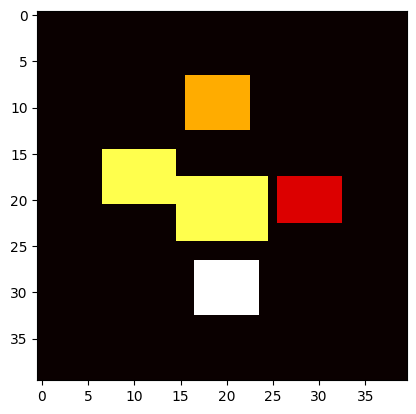

In [40]:
# reshape mean_targets_0 to 40x40
mean_targets_0 = means_target_train[0].reshape(40, 40)

# plot mean_angle as a heatmap
plt.imshow(mean_targets_0, cmap='hot', interpolation='nearest')
plt.show()

In [41]:
# print value counts of mean_targets_0
print(pd.Series(mean_targets_0.flatten()).value_counts())

0.045215    1363
0.526066     118
0.408657      42
0.630323      42
0.228067      35
dtype: int64


In [42]:
# print value counts of target_train
print(pd.Series(np.array(target_train).flatten()).value_counts())

0     21343461
18      257572
19      252841
17      245083
21      242929
20      242900
13       99313
15       98718
14       95843
16       95759
7        94372
8        92507
10       92093
9        90844
4        86564
12       84125
6        83331
5        82025
11       81152
2        80804
3        79498
1        78266
dtype: int64


In [43]:
test = [pd.read_csv(f, header=None, sep=' ', dtype="int8").to_numpy().flatten() for f in target_train_files[0:10]]

In [44]:
# print value counts of test
print(pd.Series(np.array(test).flatten()).value_counts())

0     14252
9       248
17      218
14      163
18      161
21      156
15      154
20      149
19      129
13       93
8        93
5        65
11       42
12       35
6        30
10        7
7         5
dtype: int64


In [45]:
print(target_train[1])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19
 19 19 19 19 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19 19

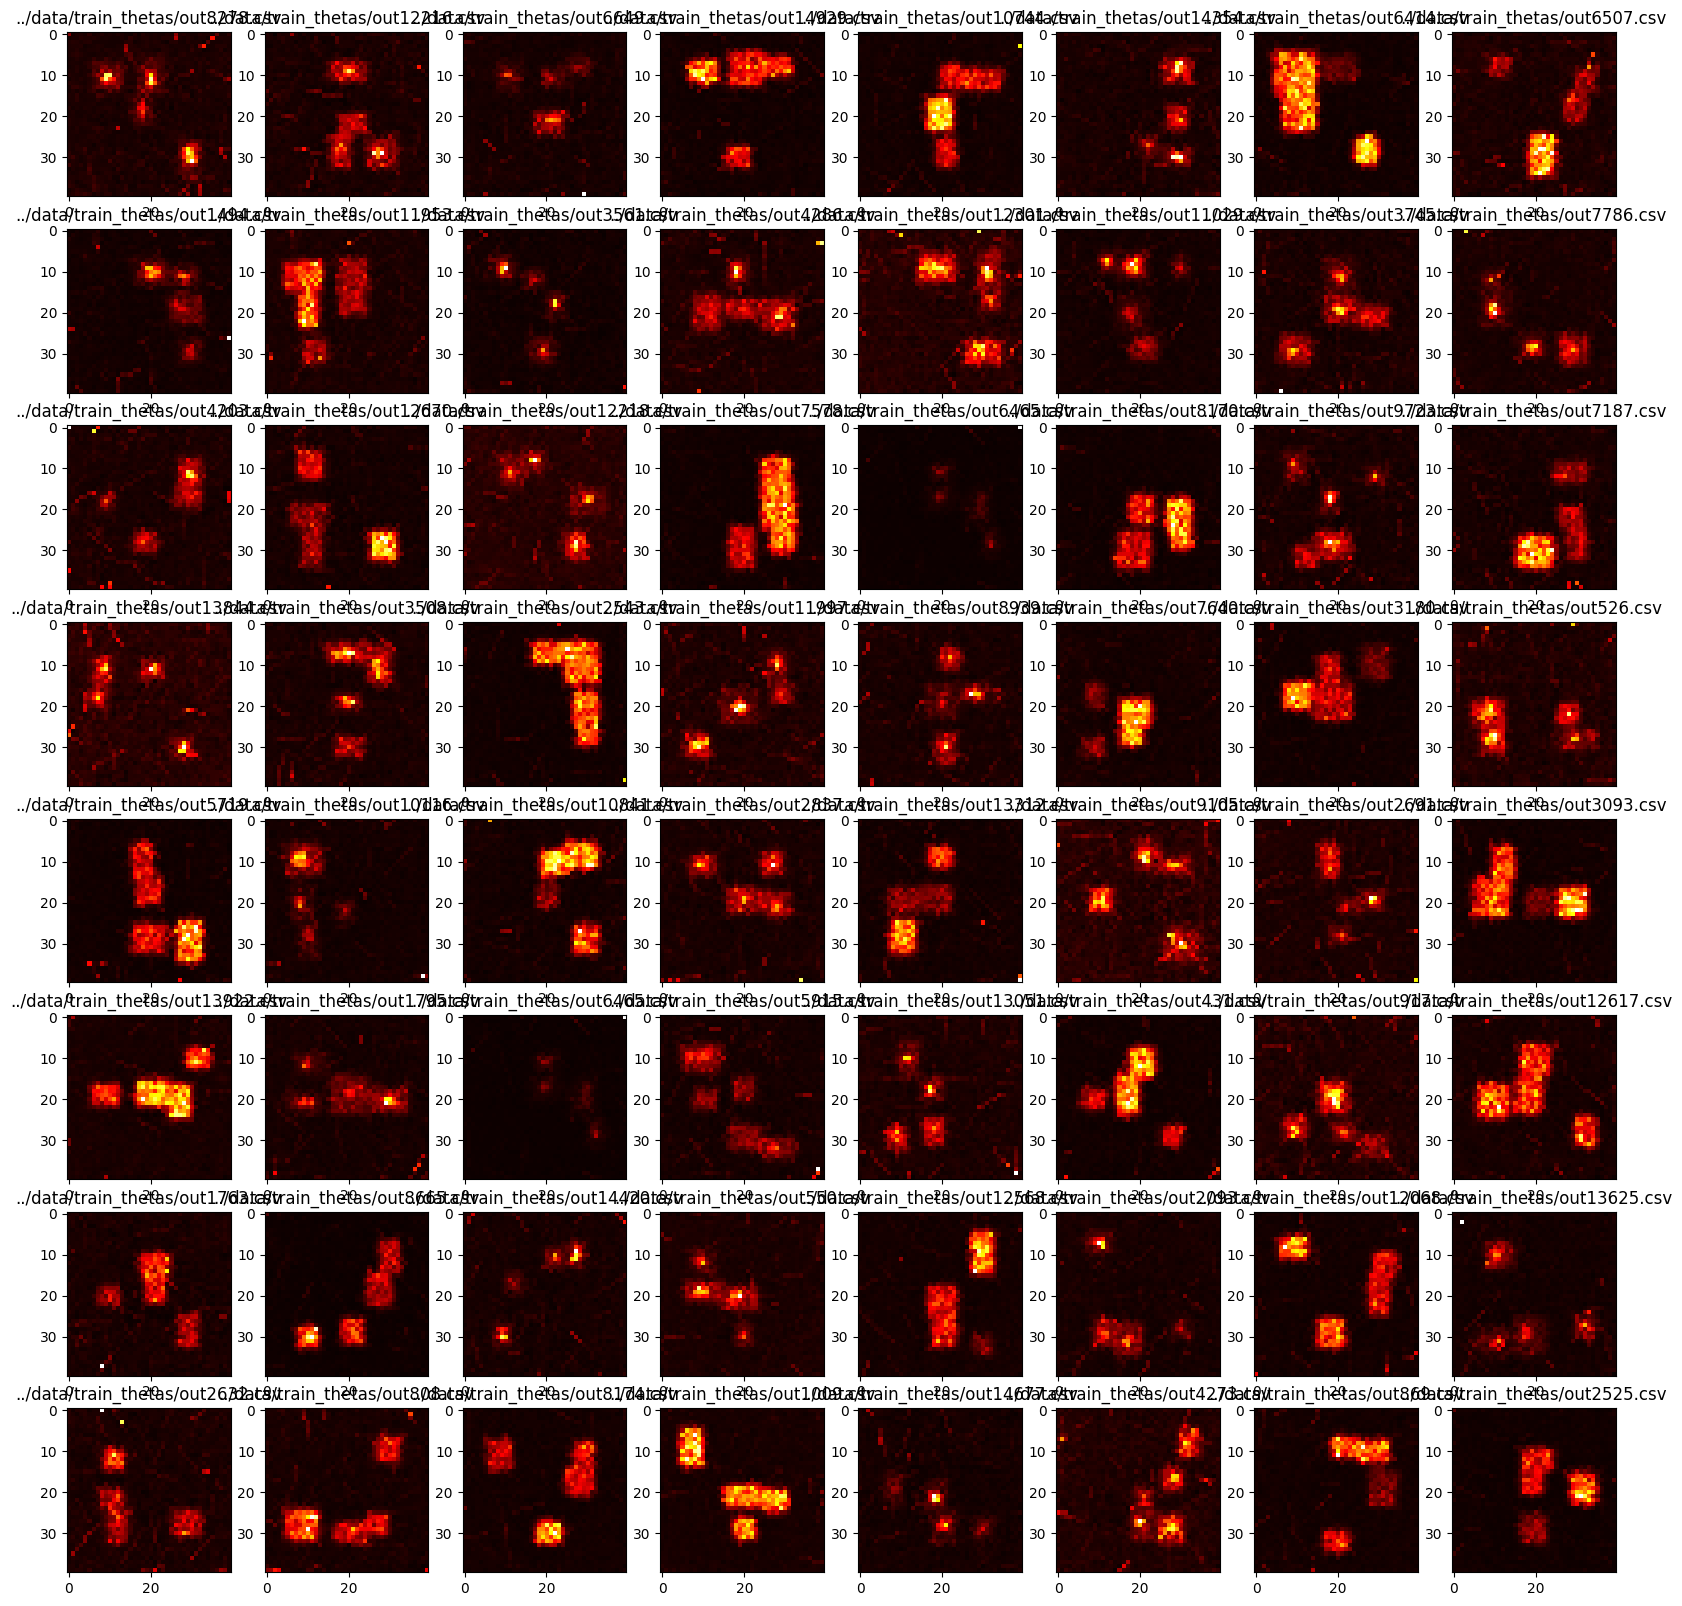

In [46]:
# visualise heatmaps of 64 random counts_grids

# create a list of 64 random files
random_files = np.random.choice(train_data_files, 64)

# create a list of 64 counts_grids
counts = [pd.read_csv(f, header=None)[0] for f in random_files]
counts_grids = [count.values.reshape(40, 40) for count in counts]

# plot counts_grids as a grid of heatmaps
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(counts_grids[i], cmap='hot', interpolation='nearest')
    ax.set_title(random_files[i])

plt.show()


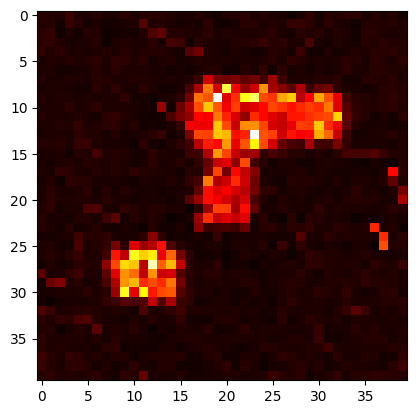

In [47]:
# visualise heatmaps of 1 random counts_grid

# create a list of 1 random file
random_file = np.random.choice(train_data_files, 1)

# create a list of 1 counts_grid
count = pd.read_csv(random_file[0], header=None)[0]
count_grid = count.values.reshape(40, 40)

# plot counts_grid as a heatmap
plt.imshow(count_grid, cmap='hot', interpolation='nearest')
plt.show()

In [48]:
np.set_printoptions(threshold=np.inf)
print(count_grid)

[[0.0440998 0.0416956 0.0398463 0.0561343 0.0378909 0.0388875 0.0440859
  0.0362067 0.0347012 0.0456868 0.0388706 0.0418754 0.0461183 0.0457608
  0.0408289 0.0378095 0.03638   0.0422068 0.0350969 0.0314308 0.0402623
  0.0421871 0.045648  0.038453  0.0414623 0.0385456 0.0362189 0.0302736
  0.0385123 0.0496376 0.0343248 0.0432065 0.0414204 0.0471093 0.0471575
  0.0343547 0.0415286 0.0349777 0.0429218 0.0323784]
 [0.040347  0.0418133 0.0325812 0.0539527 0.0443724 0.0321009 0.0375693
  0.0321735 0.0341014 0.0373728 0.0382171 0.0735552 0.0394609 0.0414701
  0.0382906 0.0340393 0.0374707 0.0332118 0.0468804 0.0321119 0.0297495
  0.0344822 0.0440938 0.0432178 0.0366774 0.0405042 0.0383806 0.0519496
  0.0523415 0.0463206 0.0348165 0.0464296 0.0374481 0.0351262 0.0294899
  0.0405194 0.0405508 0.0399031 0.0428229 0.0371134]
 [0.0469662 0.0510449 0.0302907 0.0391255 0.0319627 0.0428271 0.0402638
  0.0306636 0.0320651 0.0332681 0.0340789 0.0397164 0.0686989 0.0817329
  0.0406062 0.0413872 0.038706